# Análise Descritiva dos Reviews
### Março de 2016

In [1]:
import sys
sys.path.append("../pylinguistics/pylinguistics/")

import Pylinguistics as pl
import pandas as pd
import plotsfunc as pf
%matplotlib inline

reviews_features = pd.read_csv('reviews.csv.gz', compression='gzip')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Contagens Básicas

In [2]:
print('Reviews - Amostragem: %i' %len(reviews_features))
print('Reviews - Total de tokens no corpus: %i' % sum(reviews_features.word_count))

Reviews - Amostragem: 32226
Reviews - Total de tokens no corpus: 2103289


### 1.1 Categorias mais comentadas

In [3]:
df_agg = reviews_features[['word_count','category']].groupby(['category']).agg(['count','mean'])
df_agg['word_count'].sort_values('count',ascending=False).head(10)

,count,mean
category,,
TV,5748,69.491997
Celular e Smartphone,4985,79.095085
Camera Digital,2243,66.487294
Notebook,1407,65.659559
Ar Condicionado,1406,60.781650
Tablet,1306,67.910413
Geladeira / Refrigerador,1047,74.074499
Perfume,959,40.823775
Maquina de Lavar Roupas,945,82.765079


### 1.2 Tokens

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


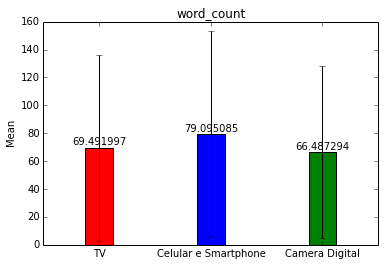

In [4]:
pf.comparaMedias(reviews_features,'word_count',['TV','Celular e Smartphone','Camera Digital'])

### 1.3 Sentenças

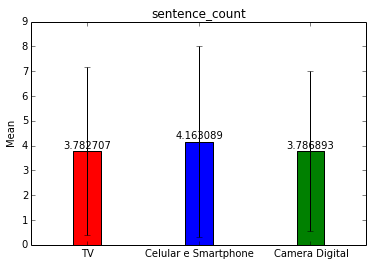

In [5]:
pf.comparaMedias(reviews_features,'sentence_count',['TV','Celular e Smartphone','Camera Digital'])

### 1.4 Tokens por sentença

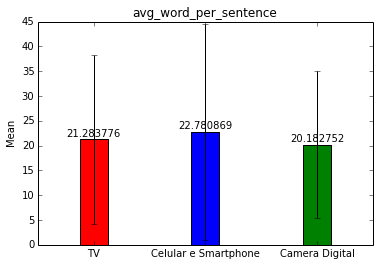

In [6]:
pf.comparaMedias(reviews_features,'avg_word_per_sentence',['TV','Celular e Smartphone','Camera Digital'])

### 1.5 Sílabas por token

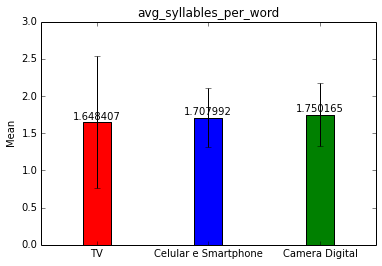

In [7]:
pf.comparaMedias(reviews_features,'avg_syllables_per_word',['TV','Celular e Smartphone','Camera Digital'])

In [8]:
mean_tv = reviews_features[reviews_features.category == 'TV'].groupby(['category']).agg(['mean'])
mean_cell = reviews_features[reviews_features.category == 'Celular e Smartphone'].groupby(['category']).agg(['mean'])
mean_camera = reviews_features[reviews_features.category == 'Camera Digital'].groupby(['category']).agg(['mean'])
most_cat = pd.concat([mean_tv, mean_cell, mean_camera])

### 1.6 Características Lógicas

In [9]:
most_cat[['LogicOperatorsIncidence','LogicIfIncidence','LogicAndIncidence','LogicOrIncidence','LogicNegationIncidence']]

,LogicOperatorsIncidence,LogicIfIncidence,LogicAndIncidence,LogicOrIncidence,LogicNegationIncidence
,mean,mean,mean,mean,mean
category,,,,,
TV,65.616748,2.856635,27.689322,1.338335,33.732457
Celular e Smartphone,65.215880,3.408774,28.573739,1.302160,31.931207
Camera Digital,65.440287,2.811543,25.931947,1.072281,35.624515


### 1.7 Características Sintáticas

In [10]:
most_cat[['pronIncidence','verbIncidence','nounIncidence','adjectiveIncidence','advIncidence']]

,pronIncidence,verbIncidence,nounIncidence,adjectiveIncidence,advIncidence
,mean,mean,mean,mean,mean
category,,,,,
TV,1.739341,52.328119,612.958787,110.586038,4.431607
Celular e Smartphone,1.676369,55.065272,604.276461,116.388110,5.401710
Camera Digital,1.595599,51.031340,604.530377,113.674527,4.239591


### 1.8 Outras Características

In [11]:
most_cat[['LexicalDiversty','ContentDiversty','ConnectiveTemporalIncidence','ConnectiveCasualIncidence']]

,LexicalDiversty,ContentDiversty,ConnectiveTemporalIncidence,ConnectiveCasualIncidence
,mean,mean,mean,mean
category,,,,
TV,0.749240,0.797425,0.503537,0.149189
Celular e Smartphone,0.741338,0.793429,0.376773,0.049271
Camera Digital,0.748507,0.798338,0.316019,0.121617


## 2. Inteligibilidade

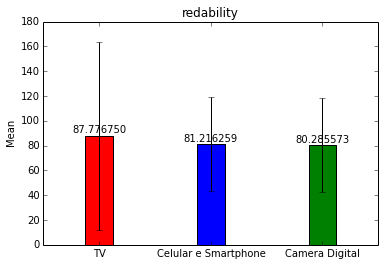

In [12]:
pf.comparaMedias(reviews_features,'redability',['TV','Celular e Smartphone','Camera Digital'])

## 3. Correlação

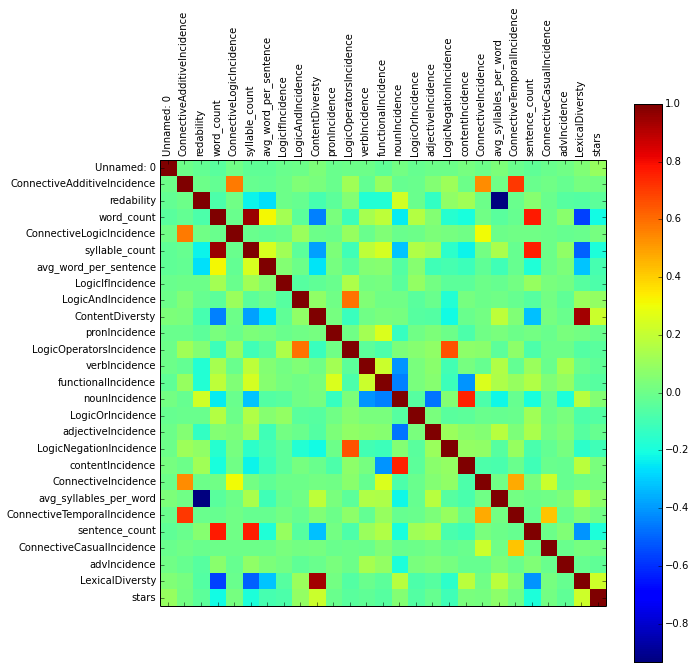

In [13]:
pf.plot_corr(reviews_features)